<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%20%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%87%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%969.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ковряк Руслан Павлович ФІТ 3-16 ЛАБА №9

Крок №1.Завантажуємо необхідні бібліотеки

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


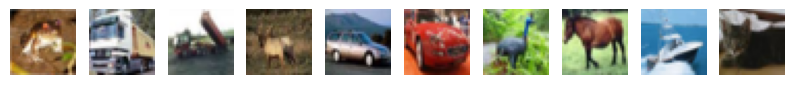

In [ ]:
# Імпортуємо потрібні бібліотеки
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Завантажуємо дані
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Показуємо перші 10 зображень
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()


In [ ]:
original_x_test = x_test.copy()  # зберігаємо оригінальні зображення для візуалізації

Крок №2.Підготавлюємо данні для роботи

In [ ]:
from tensorflow.keras.utils import to_categorical

# Масштабуємо зображення до діапазону 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Перетворюємо мітки в one-hot
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


Крок №3.Створюємо моделі

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Створюємо модель
model = Sequential()

# Перший шар
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Другий шар
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Третій шар
model.add(Conv2D(128, (3, 3), activation='relu'))

# Перетворення векторів у плоский шар
model.add(Flatten())

# Щільний шар
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Вихідний шар
model.add(Dense(10, activation='softmax'))


Крок №4.Робимо компіляцію

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Компілюємо модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Додаємо зупинку, якщо модель перестає покращуватись
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3)


Крок №5.Структура моделі

In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Крок №6.Навчання моделі

In [ ]:
history = model.fit(x_train, y_train_cat,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    callbacks=[early_stop, reduce_lr])


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 115ms/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 95ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3027 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 101ms/step - accuracy: 0.0962 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 100ms/step - accuracy: 0.0996 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3028 - learning_rate: 1.0000e-04


Крок №7.Графіки втрат та точності

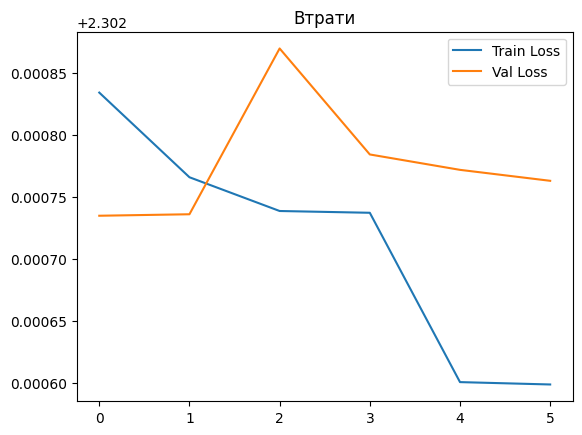

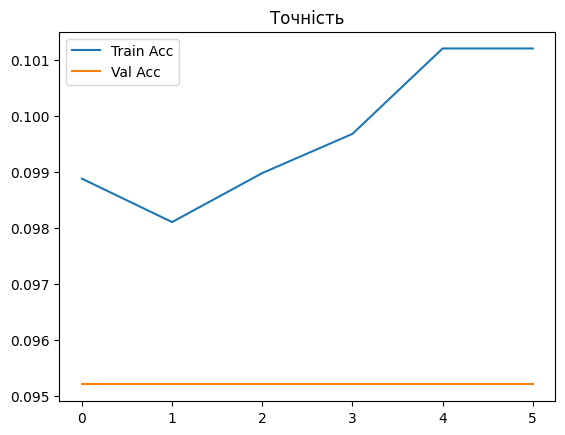

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Втрати')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Точність')
plt.legend()
plt.show()



Крок №8.Результат

In [ ]:
print(x_test.dtype, x_test.min(), x_test.max())


float64 0.0 0.00392156862745098


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Класифікаційний звіт:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


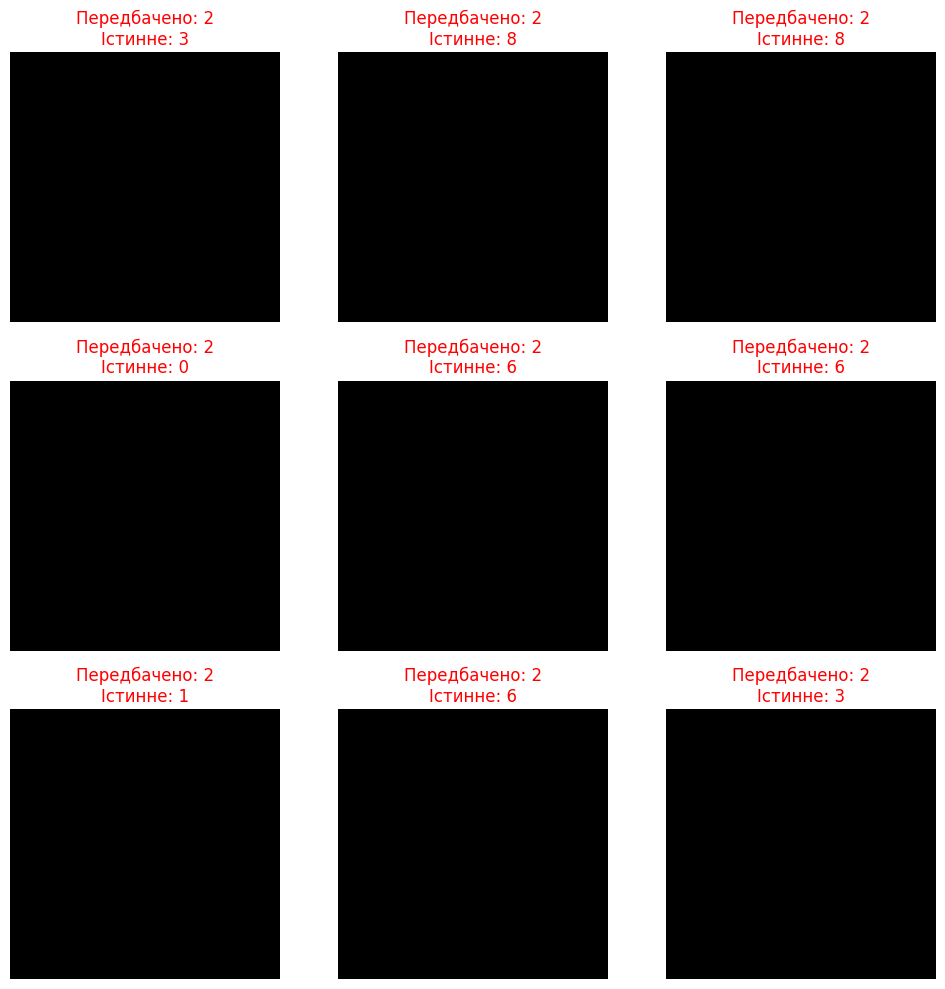

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Робимо передбачення
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Виводимо класифікаційний звіт
print("Класифікаційний звіт:\n")
print(classification_report(y_test, y_pred_classes))

# Перетворюємо зображення назад у формат, який бачить людина
x_test_vis = (x_test * 255).astype(np.uint8)  # <- ключовий момент

# Показуємо перші 9 зображень із передбаченням
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test_vis[i])  # показуємо зображення
    true_label = y_test[i][0]
    predicted_label = y_pred_classes[i]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"Передбачено: {predicted_label}\nІстинне: {true_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


Висновок:В цій лабораторній роботі ми працювали з дататесом cifar 10.Працювали з епохами,підбирили кількість,обсяг та розмір.Але фінальний крок не вийшов.Проблему не визначив,але працює,не можу зрозуміти не помилка.